In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

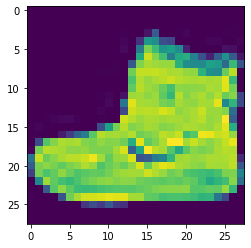

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train = X_train/255

In [ ]:
X_test = X_test/255

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [ ]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=1.5),metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train,X_train,epochs=20,validation_data=(X_test,X_test))

Epoch 1/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3924 - accuracy: 0.0640 - val_loss: 0.3348 - val_accuracy: 0.0857
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3250 - accuracy: 0.0902 - val_loss: 0.3175 - val_accuracy: 0.0925
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3134 - accuracy: 0.0992 - val_loss: 0.3150 - val_accuracy: 0.1066
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3084 - accuracy: 0.1074 - val_loss: 0.3109 - val_accuracy: 0.1112
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3051 - accuracy: 0.1130 - val_loss: 0.3078 - val_accuracy: 0.1169
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3026 - accuracy: 0.1185 - val_loss: 0.3039 - val_accuracy: 0.1270
Epoch 7/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3004 - accuracy: 0.1221 - val_loss: 0.3004 - 

In [ ]:
passed_images = autoencoder.predict(X_test[:10])

Original Image:


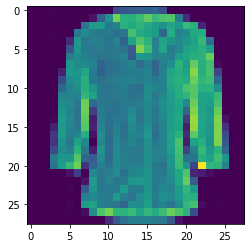

Attempted Reconstruction: (After Autoencoder)


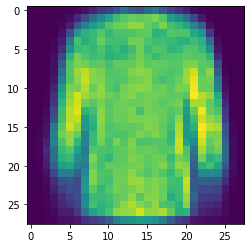

In [ ]:
n = 4
print('Original Image:')
plt.imshow(X_test[n])
plt.show()
print("Attempted Reconstruction: (After Autoencoder)")
plt.imshow(passed_images[n])

In [ ]:
from tensorflow.keras.layers import GaussianNoise

In [ ]:
sample = GaussianNoise(0.4)

In [ ]:
noisey = sample(X_test[:10],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Original Image:


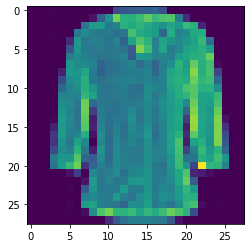

Noise Version


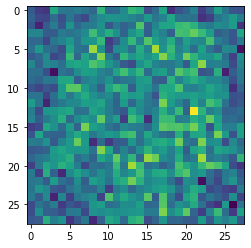

In [ ]:
n = 4
print('Original Image:')
plt.imshow(X_test[n])
plt.show()
print("Noise Version")
plt.imshow(noisey[n])

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.3))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [ ]:
noise_remover = Sequential([encoder,decoder])
noise_remover.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
noise_remover.fit(X_train,X_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3274 - accuracy: 0.0905
Epoch 2/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3023 - accuracy: 0.1212
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2969 - accuracy: 0.1373
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2935 - accuracy: 0.1465
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2909 - accuracy: 0.1545
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2893 - accuracy: 0.1594
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2881 - accuracy: 0.1628
Epoch 8/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2872 - accuracy: 0.1666
Epoch 9/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2865 - accuracy: 0.1696
Epoch 10/20
1875/1875 [==============================] - 20s 10m

In [ ]:
noisy_images = sample(X_test[:10],training=True)

In [ ]:
denoised = noise_remover(noisy_images)

Original Image:


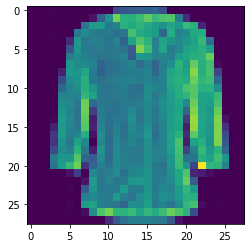

Noise Added Image:


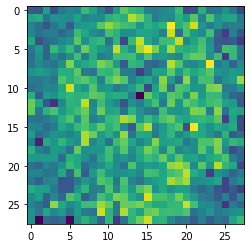

After noise removal from Autoencoder:


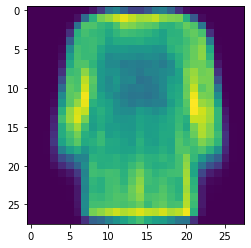

In [ ]:
n = 4
print('Original Image:')
plt.imshow(X_test[n])
plt.show()
print('Noise Added Image:')
plt.imshow(noisy_images[n])
plt.show()
print('After noise removal from Autoencoder:')
plt.imshow(denoised[n])
plt.show()

Applying Covolutional Layer Method


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


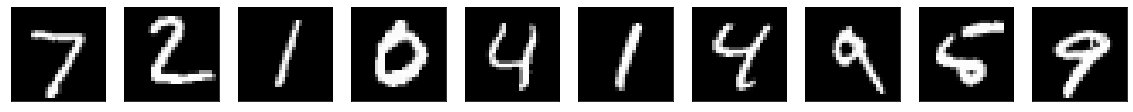

In [ ]:
import matplotlib.pyplot as plt

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# The encoding process
input_img = Input(shape=(28, 28, 1))

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)


In [ ]:
###########
# Decoding #
############

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
# Declare the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the model
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
               )

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)
               )

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()